# Delayed Flights Decision Trees

In [ ]:
# Initial imports
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
# load data flight from amazon aws 
data = "https://airport-efficiency.s3.amazonaws.com/Merged_cleaned_airport_data.csv"
df = pd.read_csv(data)
df.head()

,YEAR,MONTH,DAY_OF_WEEK,BRANDED_CODE_SHARE,ORIGIN,DEST,DEST_STATE_NM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,...,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DELAYED,DATE,COVID,DELAY_REASON
0,2018,1,1,UA,BWI,DEN,Colorado,1608,1600.0,-8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-22,0.0,0.0
1,2018,1,1,UA,BWI,ORD,Illinois,1644,1637.0,-7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-22,0.0,0.0
2,2018,1,1,UA,BWI,IAH,Texas,1806,1800.0,-6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-22,0.0,0.0
3,2018,1,1,UA,BWI,IAH,Texas,828,828.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-08,0.0,0.0
4,2018,1,1,UA,BWI,DEN,Colorado,810,802.0,-8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-08,0.0,0.0


In [ ]:
# merge "codeshares" to their corresponding airlines 
df.loc[(df.BRANDED_CODE_SHARE == "UA_CODESHARE"), "BRANDED_CODE_SHARE"] = "UA"
df.loc[(df.BRANDED_CODE_SHARE == "AA_CODESHARE"), "BRANDED_CODE_SHARE"] = "AA"
df.loc[(df.BRANDED_CODE_SHARE == "DL_CODESHARE"), "BRANDED_CODE_SHARE"] = "DL"
df.loc[(df.BRANDED_CODE_SHARE == "AS_CODESHARE"), "BRANDED_CODE_SHARE"] = "AS"


In [ ]:
#divide the states into five regions 
northeast = ['Massachusetts',
'Rhode Island',
'Connecticut',
'Vermont',
'New Hampshire',
'Maine',
'Pennsylvania',
'New Jersey',
'New York'
]

In [ ]:
souteast = ['Georgia',
'North Carolina',
'South Carolina',
'Virginia',
'West Virginia',
'Kentucky',
'Tennessee',
'Mississippi',
'Alabama',
'Delaware',
'Maryland',
'Florida',
'Louisiana',
'Arkansas'
]

In [ ]:
midwest = ['Minnesota',
'Wisconsin',
'Illinois',
'Ohio',
'Indiana',
'Michigan',
'Missouri',
'Iowa',
'Kansas',
'Nebraska',
'North Dakota',
'South Dakota'
]

In [ ]:
southwest = ['New Mexico',
'Arizona',
'Oklahoma',
'Texas'
]

In [ ]:
west = ['California',
'Colorado',
'Nevada',
'Hawaii',
'Alaska',
'Oregon',
'Utah',
'Idaho',
'Montana',
'Wyoming',
'Washington'
]

In [ ]:
noncontinental = ['U.S. Virgin Islands',
'Puerto Rico'
]

In [ ]:
# this code created a new column "region" and classifies each state to its corresponding region 
regions=pd.DataFrame([northeast,souteast,midwest,southwest,west,noncontinental],index=['northeast','souteast','midwest','southwest','west','noncontinental'])
regions=regions.reset_index().melt('index')
df['Region'] = df['DEST_STATE_NM'].map(dict(zip(regions['value'],regions['index'])))

In [ ]:
# drop more columns to make sure it does not overlap with delays. 
drop = ['DEP_TIME','DEP_DELAY_GROUP',  'DEST_STATE_NM', 'DEST', 'DEP_DELAY', 'DEP_TIME_BLK', 'LATE_AIRCRAFT_DELAY', 'CARRIER_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'NAS_DELAY', 'DELAY_REASON', 'CRS_DEP_TIME']


In [ ]:
#create a new df without the dropped columns 
df_dropped = df.drop( drop , 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
# check the columns that are going to be used in our machine learning model 
df_dropped.columns.values.tolist()

['YEAR',
 'MONTH',
 'DAY_OF_WEEK',
 'BRANDED_CODE_SHARE',
 'ORIGIN',
 'CANCELLED',
 'DIVERTED',
 'DELAYED',
 'DATE',
 'COVID',
 'Region']

In [ ]:
# use get_dummies for the brand column 
brand_df = pd.get_dummies(df_dropped, columns=["BRANDED_CODE_SHARE"])


In [ ]:
# use get_dummies for the origin column 
origin_df = pd.get_dummies(brand_df, columns=["ORIGIN"])

In [ ]:
# use get_dummies for the region column 
final_df = pd.get_dummies(origin_df, columns=["Region"])

In [ ]:
#final drop = date 
final_df =final_df.drop('DATE',1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


## Loading and Preprocessing Loans Encoded Data

In [ ]:
# Define features set
X = final_df.drop(columns=["DELAYED"])
X.head()

,YEAR,MONTH,DAY_OF_WEEK,CANCELLED,DIVERTED,COVID,BRANDED_CODE_SHARE_AA,BRANDED_CODE_SHARE_AS,BRANDED_CODE_SHARE_B6,BRANDED_CODE_SHARE_DL,...,BRANDED_CODE_SHARE_WN,ORIGIN_BWI,ORIGIN_DCA,ORIGIN_IAD,Region_midwest,Region_noncontinental,Region_northeast,Region_souteast,Region_southwest,Region_west
0,2018,1,1,0.0,0.0,0.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,2018,1,1,0.0,0.0,0.0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,2018,1,1,0.0,0.0,0.0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,2018,1,1,0.0,0.0,0.0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,2018,1,1,0.0,0.0,0.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
# Define target vector
y = final_df["DELAYED"].values.reshape(-1, 1)
y[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1000)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(812203, 25)
(270735, 25)
(812203, 1)
(270735, 1)


In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state=1000, train_size=0.80)

In [ ]:
print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(866350, 25)
(216588, 25)
(866350, 1)
(216588, 1)


In [ ]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [ ]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [ ]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


## Fitting the Decision Tree Model

In [ ]:
# Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [ ]:
# Fitting the model
model = model.fit(X_train_scaled, y_train)

## Making Predictions Using the Tree Model

In [ ]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)

## Model Evaluation

In [ ]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [ ]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,220458,2035
Actual 1,46446,1796


Accuracy Score : 0.8209282139361368
Classification Report
              precision    recall  f1-score   support

         0.0       0.83      0.99      0.90    222493
         1.0       0.47      0.04      0.07     48242

    accuracy                           0.82    270735
   macro avg       0.65      0.51      0.48    270735
weighted avg       0.76      0.82      0.75    270735



Feature: 0, Score: 0.21926
Feature: 1, Score: 0.23409
Feature: 2, Score: 0.16779
Feature: 3, Score: 0.01064
Feature: 4, Score: 0.01772
Feature: 5, Score: 0.00077
Feature: 6, Score: 0.01360
Feature: 7, Score: 0.00504
Feature: 8, Score: 0.01169
Feature: 9, Score: 0.01312
Feature: 10, Score: 0.00713
Feature: 11, Score: 0.00337
Feature: 12, Score: 0.00569
Feature: 13, Score: 0.01678
Feature: 14, Score: 0.00033
Feature: 15, Score: 0.07344
Feature: 16, Score: 0.04475
Feature: 17, Score: 0.01994
Feature: 18, Score: 0.02003
Feature: 19, Score: 0.01760
Feature: 20, Score: 0.01023
Feature: 21, Score: 0.02868
Feature: 22, Score: 0.02110
Feature: 23, Score: 0.01697
Feature: 24, Score: 0.02025


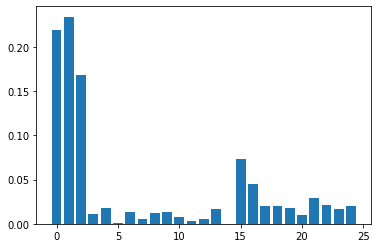

In [ ]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
# We can sort the features by their importance.
sorted(zip(model.feature_importances_, X.columns), reverse=True)

[(0.23408614210835998, 'MONTH'),
 (0.21925931088592177, 'YEAR'),
 (0.16778611514245087, 'DAY_OF_WEEK'),
 (0.07344355162323095, 'BRANDED_CODE_SHARE_WN'),
 (0.04474625605193565, 'ORIGIN_BWI'),
 (0.02867714619821161, 'Region_northeast'),
 (0.021098214547601118, 'Region_souteast'),
 (0.020245404806269837, 'Region_west'),
 (0.02003482498950289, 'ORIGIN_IAD'),
 (0.019935242949700657, 'ORIGIN_DCA'),
 (0.01772460029347583, 'DIVERTED'),
 (0.01759586184662524, 'Region_midwest'),
 (0.016971200748591504, 'Region_southwest'),
 (0.016783945436765233, 'BRANDED_CODE_SHARE_UA'),
 (0.013600506650879156, 'BRANDED_CODE_SHARE_AA'),
 (0.013121875567409198, 'BRANDED_CODE_SHARE_DL'),
 (0.011692915766516418, 'BRANDED_CODE_SHARE_B6'),
 (0.010635586828365252, 'CANCELLED'),
 (0.010234393165994336, 'Region_noncontinental'),
 (0.007125831225928814, 'BRANDED_CODE_SHARE_F9'),
 (0.005693030091309751, 'BRANDED_CODE_SHARE_NK'),
 (0.005038061339045735, 'BRANDED_CODE_SHARE_AS'),
 (0.003371145236167365, 'BRANDED_CODE_SHARE